In [1]:
print("hello")

hello


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('Bird Strikes data.xlsx')
print(df)
df.columns

       Record ID Aircraft: Type                    Airport: Name Altitude bin  \
0         202152       Airplane                     LAGUARDIA NY    > 1000 ft   
1         208159       Airplane      DALLAS/FORT WORTH INTL ARPT    < 1000 ft   
2         207601       Airplane                LAKEFRONT AIRPORT    < 1000 ft   
3         215953       Airplane              SEATTLE-TACOMA INTL    < 1000 ft   
4         219878       Airplane                     NORFOLK INTL    < 1000 ft   
...          ...            ...                              ...          ...   
25553     321151       Airplane                REDDING MUNICIPAL    > 1000 ft   
25554     319677       Airplane                     ORLANDO INTL    < 1000 ft   
25555     319680            NaN                              NaN          NaN   
25556     319679       Airplane  DETROIT METRO WAYNE COUNTY ARPT    < 1000 ft   
25557     319593       Airplane     ABRAHAM LINCOLN CAPITAL ARPT    < 1000 ft   

      Aircraft: Make/Model 

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

## Case 1.1 : Plotting the number of bird strikes per year

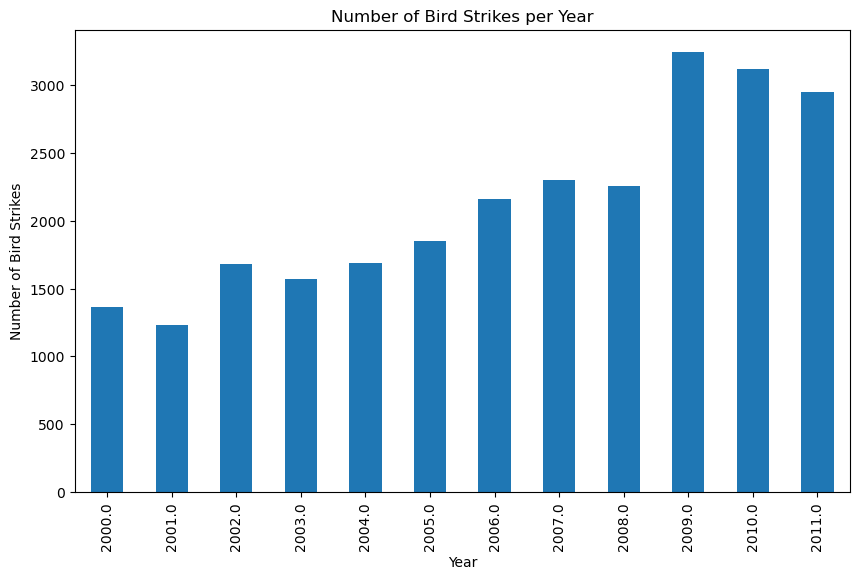

In [6]:
df['Year'] = pd.DatetimeIndex(df['FlightDate']).year
yearly_strikes = df.groupby('Year').size()

plt.figure(figsize=(10, 6))
yearly_strikes.plot(kind='bar')
plt.title('Number of Bird Strikes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.show()

## Case 1.2: Plotting bird strikes by month

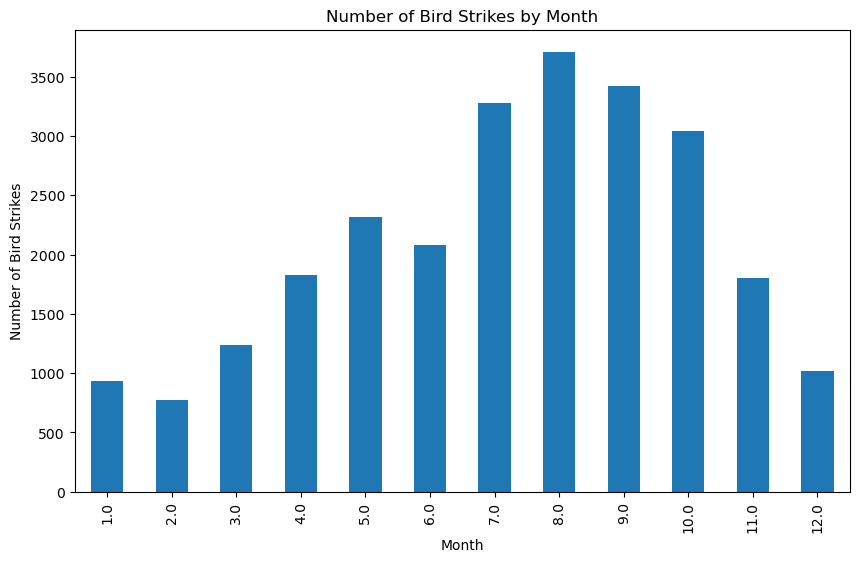

In [7]:
df['Month'] = pd.DatetimeIndex(df['FlightDate']).month
monthly_strikes = df.groupby('Month').size()

plt.figure(figsize=(10, 6))
monthly_strikes.plot(kind='bar')
plt.title('Number of Bird Strikes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bird Strikes')
plt.show()

# Case 2:  Time-series analysis of bird strikes from 2000 to 2011

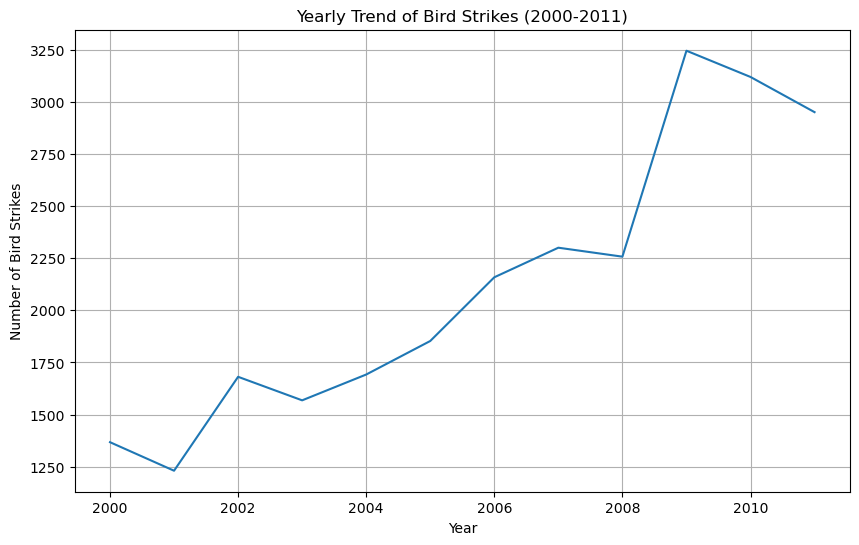

In [8]:
df = df[(df['Year'] >= 2000) & (df['Year'] <= 2011)]
yearly_strikes = df.groupby('Year').size()

plt.figure(figsize=(10, 6))
yearly_strikes.plot(kind='line')
plt.title('Yearly Trend of Bird Strikes (2000-2011)')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.grid(True)
plt.show()

# Case 3 : Aggregate bird strikes by airline

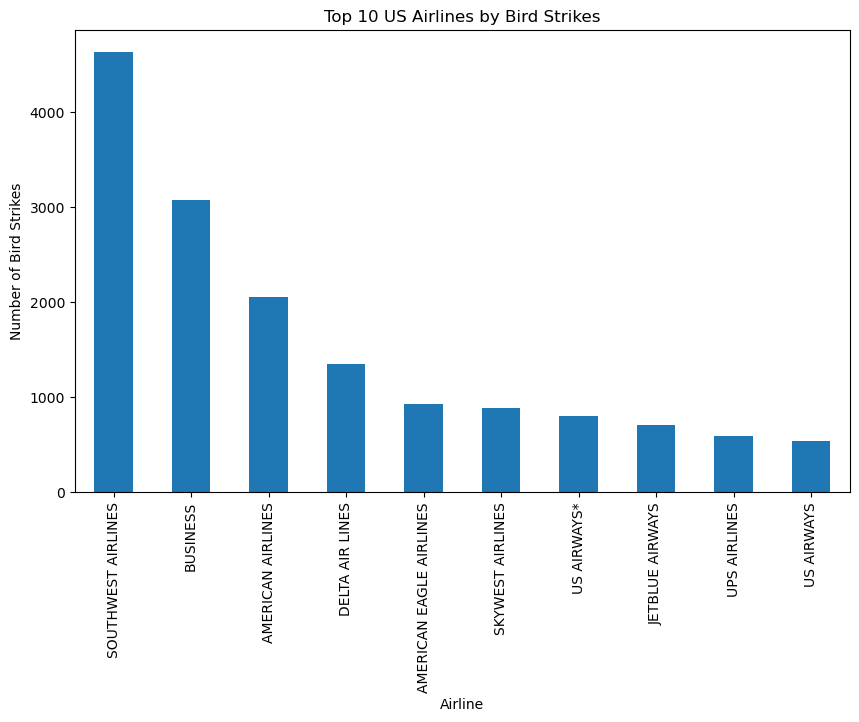

In [11]:
airline_strikes = df.groupby('Aircraft: Airline/Operator').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
airline_strikes.plot(kind='bar')
plt.title('Top 10 US Airlines by Bird Strikes')
plt.xlabel('Airline')
plt.ylabel('Number of Bird Strikes')
plt.show()

# Case 4 : Airports with Most Incidents of Bird Strikes - Top 50

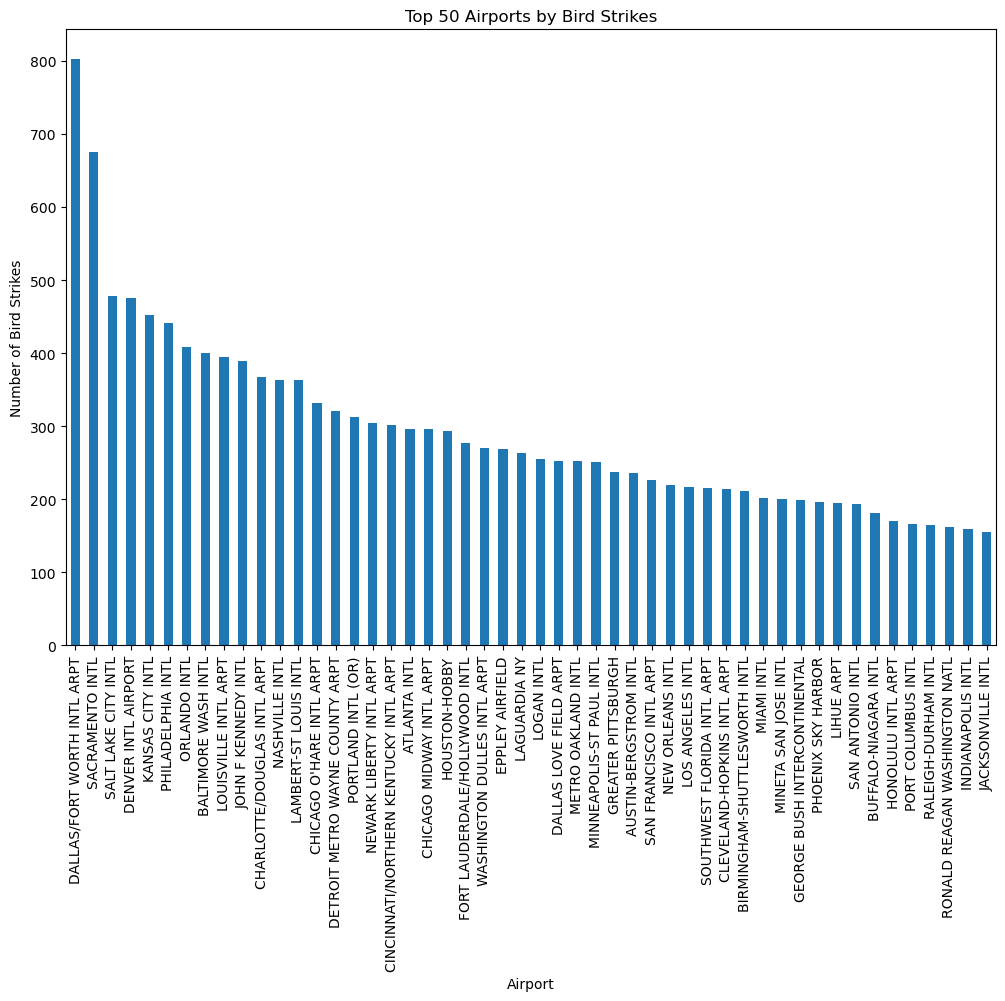

In [12]:

airport_strikes = df.groupby('Airport: Name').size().sort_values(ascending=False).head(50)

plt.figure(figsize=(12, 8))
airport_strikes.plot(kind='bar')
plt.title('Top 50 Airports by Bird Strikes')
plt.xlabel('Airport')
plt.ylabel('Number of Bird Strikes')
plt.show()


# Case 5. Yearly Cost Incurred due to Bird Strikes

  FlightDate    Year
0 2000-11-23  2000.0
1 2001-07-25  2001.0
2 2001-09-14  2001.0
3 2002-09-05  2002.0
4 2003-06-23  2003.0


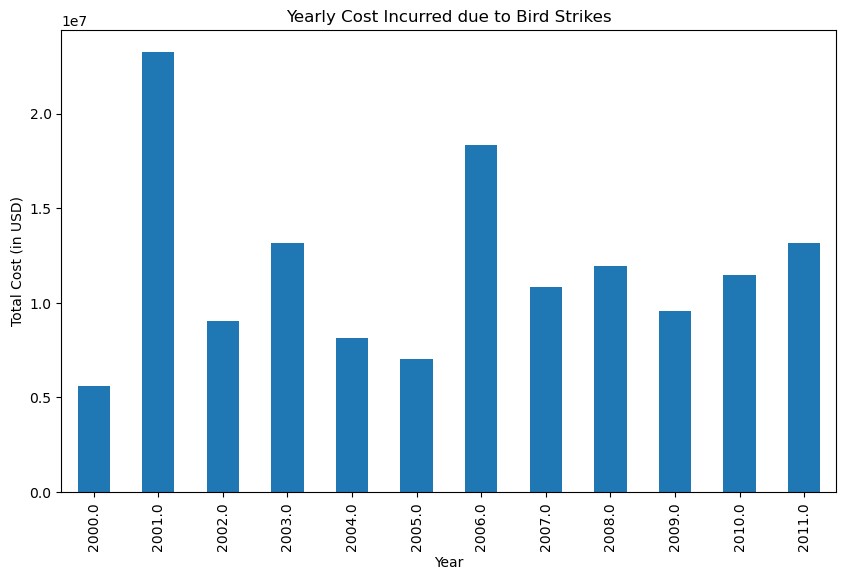

In [21]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'], errors='coerce')
df['Year'] = df['FlightDate'].dt.year

# Check if the 'Year' column has been created correctly
print(df[['FlightDate', 'Year']].head())

# Calculate the total yearly cost incurred due to bird strikes
yearly_cost = df.groupby('Year')['Cost: Total $'].sum()

plt.figure(figsize=(10, 6))
yearly_cost.plot(kind='bar')
plt.title('Yearly Cost Incurred due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost (in USD)')
plt.show()


# Case 6: Altitude of Aeroplanes at the Time of Strike

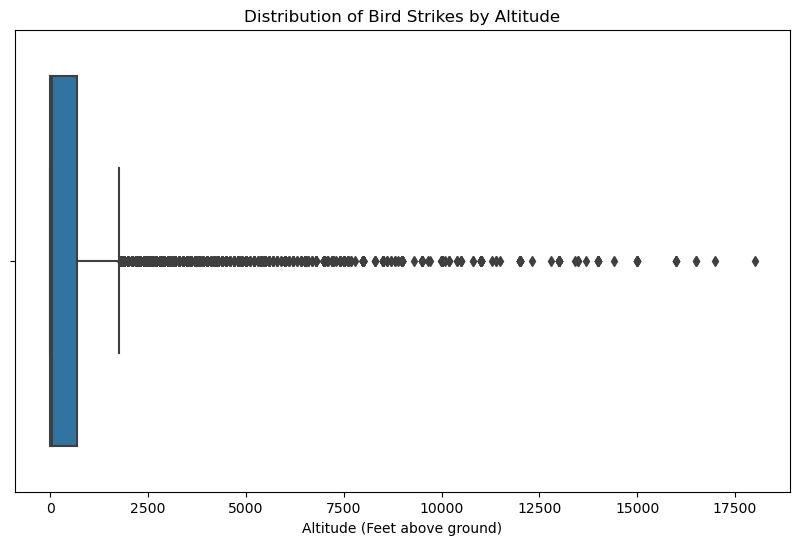

In [33]:
import seaborn as sns

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of bird strikes by altitude using the numeric 'Feet above ground' column
plt.figure(figsize=(10, 6))
sns.boxplot(x='Feet above ground', data=df)
plt.title('Distribution of Bird Strikes by Altitude')
plt.xlabel('Altitude (Feet above ground)')
plt.show()



#  Case 7: Phase of Flight at the Time of the Strike

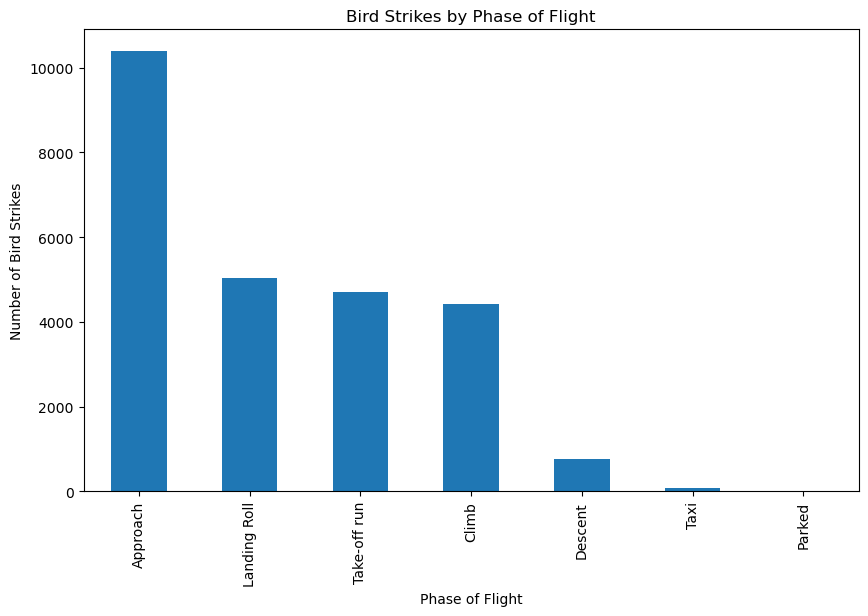

In [34]:
# Categorize bird strikes by phases of flight
flight_phase_strikes = df.groupby('When: Phase of flight').size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
flight_phase_strikes.plot(kind='bar')
plt.title('Bird Strikes by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.show()


#  Case 8: Effect of Bird Strikes & Impact on Flight

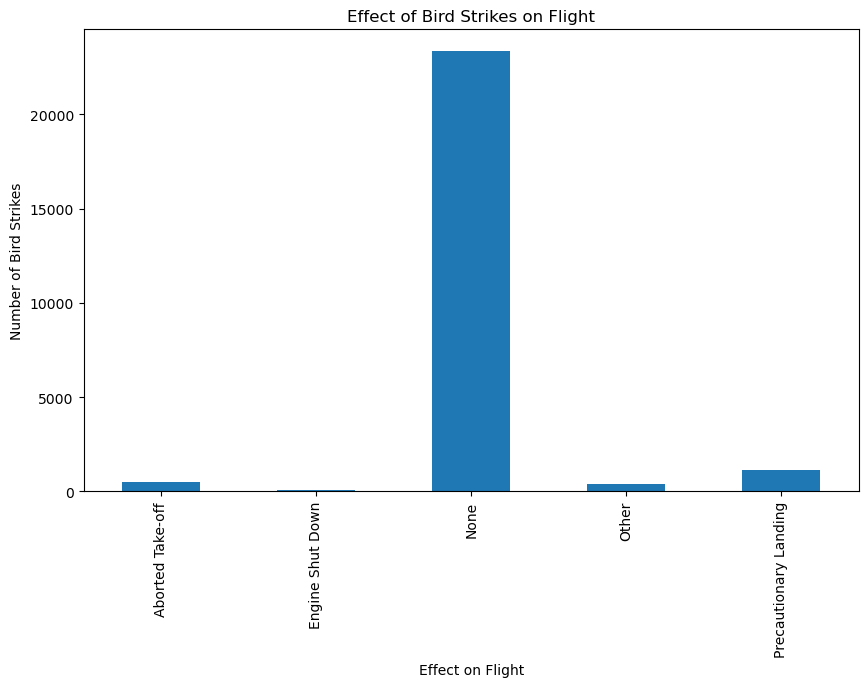

In [36]:
# Analyze the effect of bird strikes on flight operations
effect_strikes = df.groupby('Effect: Impact to flight').size()

plt.figure(figsize=(10, 6))
effect_strikes.plot(kind='bar')
plt.title('Effect of Bird Strikes on Flight')
plt.xlabel('Effect on Flight')
plt.ylabel('Number of Bird Strikes')
plt.show()


# Case 9 : Were Pilots Informed? & Prior Warning and Effect of Strike Relation

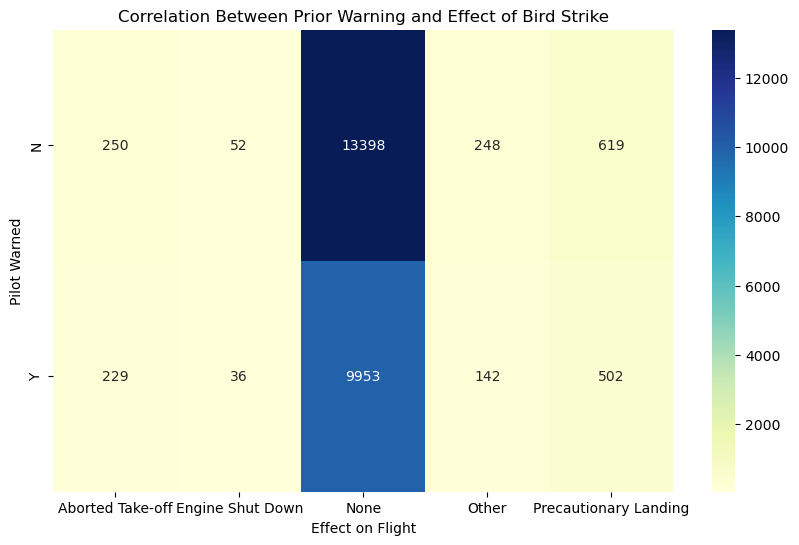

In [37]:
# Analyze if pilots were warned and correlate it with the effect of the strike
contingency_table = pd.crosstab(df['Pilot warned of birds or wildlife?'], df['Effect: Impact to flight'])

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Correlation Between Prior Warning and Effect of Bird Strike')
plt.xlabel('Effect on Flight')
plt.ylabel('Pilot Warned')
plt.show()


In [26]:
df.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'Year'],
      dtype='object')